In [ ]:
from tqdm import tqdm

import pandas as pd

import re
import matplotlib.pyplot as plt




from PIL import Image

import torch


In [2]:
# image_path = 'Images' 
data = pd.read_csv("D:\kaggle\gpu\captions.txt\captions.txt")
data.shape

<>:2: SyntaxWarning: invalid escape sequence '\k'
<>:2: SyntaxWarning: invalid escape sequence '\k'
C:\Users\Ehsan\AppData\Local\Temp\ipykernel_18052\786324316.py:2: SyntaxWarning: invalid escape sequence '\k'
  data = pd.read_csv("D:\kaggle\gpu\captions.txt\captions.txt")


(40455, 2)

In [3]:
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [4]:
df=data['image']

In [5]:
data.sample(n = 1)["image"].iloc[0]

'3541483943_9776baee7c.jpg'

In [6]:
for x in range(10):
    x=(data.sample(n = 1)["image"].iloc[0])
    print(x)

3459419203_cd7c68ce4d.jpg
426920445_d07d1fd0f7.jpg
1204996216_71d7519d9a.jpg
2840344516_8e15fe2668.jpg
3301859683_2d5e4b40a3.jpg
3187117682_986ffd6b67.jpg
3046949818_245b05f507.jpg
2626158969_ac09aeb88d.jpg
3349309109_4024a09a17.jpg
3652584682_5b5c43e445.jpg


In [7]:
import os
from textwrap import wrap

In [8]:
x=(data.iloc[8:10]).iloc[0]
x

image                              1001773457_577c3a7d70.jpg
caption    Two dogs of different breeds looking at each o...
Name: 8, dtype: object

In [9]:
x=data.sample(10)
x.head(10)

,image,caption
38195,528498076_43f0ef36b5.jpg,A boy jumps on a bed .
7218,2288099178_41091aa00c.jpg,Two boys race on ice skates while others watch .
32515,3608567609_aae96d4a5e.jpg,The girl with red sunglasses and a white shirt...
14676,2785115802_137fa30000.jpg,A dog swims in the water .
33479,3647283075_3005333222.jpg,Skateboarder in a red shirt grinding along the...
13857,2723477522_d89f5ac62b.jpg,The large brown dog is chasing after the littl...
16873,2918653119_f535fc25c4.jpg,A skateboarder glides down a railing of some s...
26182,3354414391_a3908bd4ff.jpg,Two dogs play on the grass .
30883,3541962817_78bcd3835b.jpg,The horse and rider are jumping over a fence .
2321,143688205_630813a466.jpg,A man is climbing a rope up a cliff .


In [10]:
def show_images(df, data):
    df = df.reset_index(drop=True)
    samples = data.sample(10)  # انتخاب ۱۰ تصویر به‌صورت تصادفی
    plt.figure(figsize=(20, 10))
    
    for i, (_, row) in enumerate(samples.iterrows()):
        image_name = row['image']
        caption = row['caption']
        image_path = os.path.join(r"D:\kaggle\gpu\image", image_name)
        
        plt.subplot(2, 5, i + 1)
        plt.subplots_adjust(hspace=1, wspace=0.5)
        
        try:
            image = Image.open(image_path).convert("RGB")
            plt.imshow(image)
            plt.title("\n".join(wrap(str(caption), 20)))
        except Exception as e:
            plt.text(0.5, 0.5, f"خطا در بارگذاری عکس\n{e}", ha='center', va='center')
        
        plt.axis('off')
    
    plt.show()

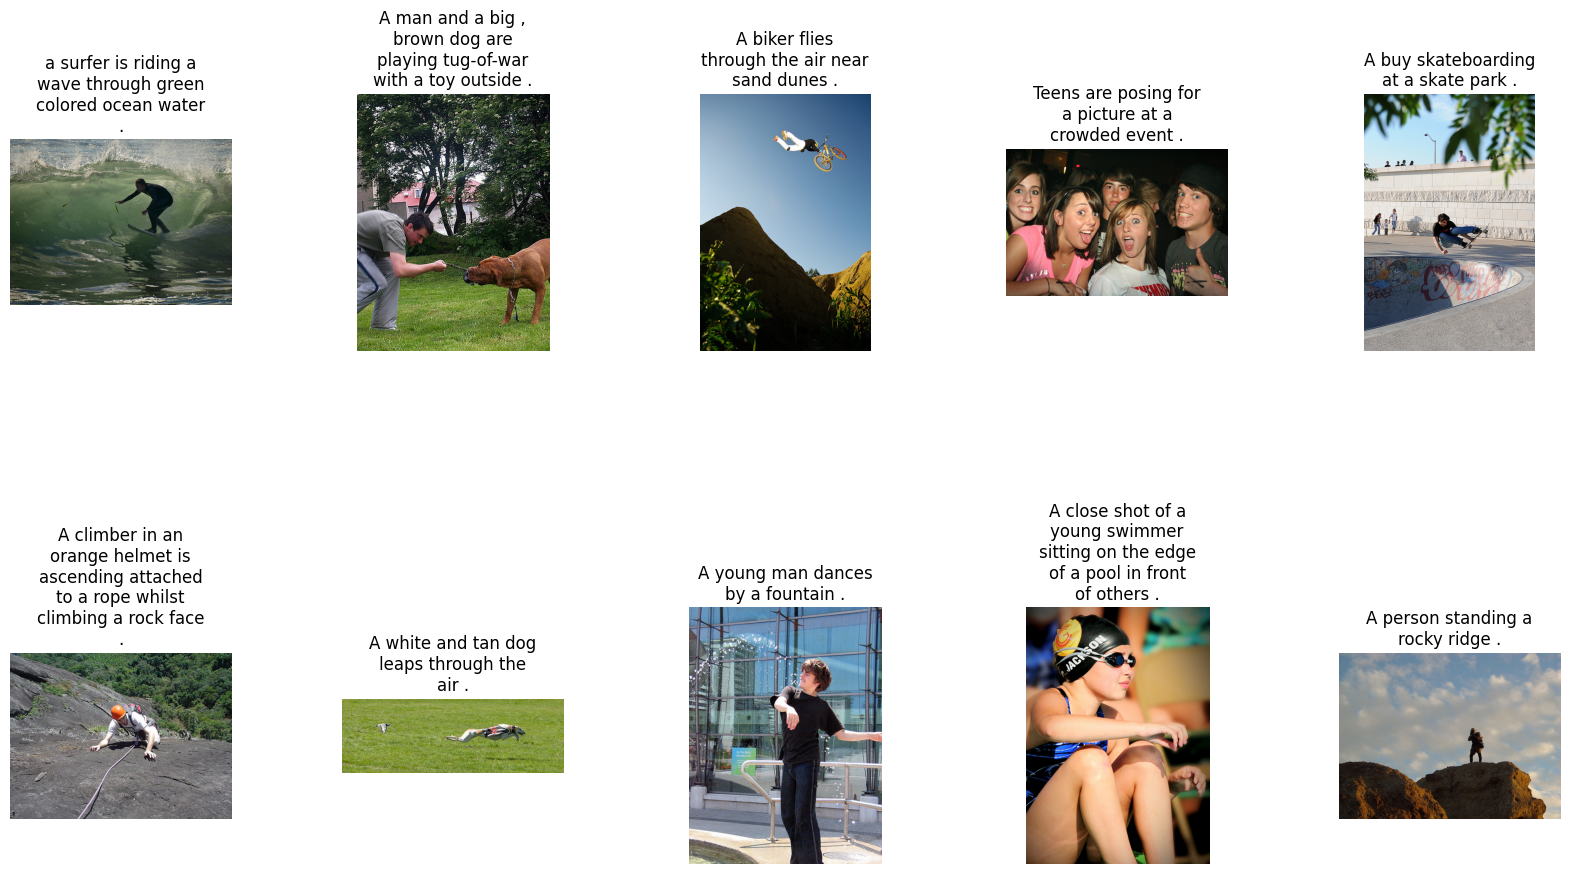

In [11]:
show_images(df,data)

In [12]:
def clean_caption(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = " ".join([w for w in text.split() if len(w) > 1])
    return "[CLS] " + text + " [SEP]"

data['caption'] = data['caption'].apply(clean_caption)

In [13]:
# data_new = text_preprocessing(data)
captions = data["caption"].tolist()
captions

['[CLS] child in pink dress is climbing up set of stairs in an entry way [SEP]',
 '[CLS] girl going into wooden building [SEP]',
 '[CLS] little girl climbing into wooden playhouse [SEP]',
 '[CLS] little girl climbing the stairs to her playhouse [SEP]',
 '[CLS] little girl in pink dress going into wooden cabin [SEP]',
 '[CLS] black dog and spotted dog are fighting [SEP]',
 '[CLS] black dog and tricolored dog playing with each other on the road [SEP]',
 '[CLS] black dog and white dog with brown spots are staring at each other in the street [SEP]',
 '[CLS] two dogs of different breeds looking at each other on the road [SEP]',
 '[CLS] two dogs on pavement moving toward each other [SEP]',
 '[CLS] little girl covered in paint sits in front of painted rainbow with her hands in bowl [SEP]',
 '[CLS] little girl is sitting in front of large painted rainbow [SEP]',
 ...]

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [94]:
import torchvision.models as models
import torchvision.transforms as transforms

In [27]:
image_path = r"D:\kaggle\gpu\image"
img_size = 64

# مدل DenseNet با حذف لایه طبقه‌بندی
model = models.densenet121(pretrained=True)
model.classifier = torch.nn.Identity()  # حذف لایه آخر
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Transform متناسب با DenseNet
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# استخراج ویژگی‌ها
features = {}
for image_name in tqdm(data['image'].unique().tolist(), desc="📷 استخراج ویژگی‌ها"):
    img = Image.open(os.path.join(image_path, image_name)).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)  # اضافه کردن batch dim

    with torch.no_grad():
        feature = model(img_tensor).squeeze().cpu().numpy()

    features[image_name] = feature



# تبدیل به DataFrame
flattened_data = {key: value.flatten() for key, value in features.items()}
df = pd.DataFrame.from_dict(flattened_data, orient='index')

d:\kaggle\gpu\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\kaggle\gpu\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
📷 استخراج ویژگی‌ها: 100%|██████████| 8091/8091 [03:27<00:00, 38.97it/s]


In [ ]:
df.to_csv("features.csv", index=True)

In [97]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
1000268201_693b08cb0e.jpg,0.000530,0.020955,0.000000,0.000478,0.102640,2.816984,0.000314,0.000894,0.500193,0.000541,...,5.755997,0.000000,11.968189,0.855762,2.582031,0.000000,2.545345,3.693776,3.893597,5.397243
1001773457_577c3a7d70.jpg,0.000896,0.004986,0.001943,0.005952,0.012798,0.276479,0.001835,0.012086,0.115777,0.001839,...,0.703914,5.111289,5.492939,10.403438,0.000000,0.000000,1.604755,3.473159,0.753371,13.305740
1002674143_1b742ab4b8.jpg,0.000139,0.010884,0.000000,0.001002,0.310223,0.572058,0.001189,0.001960,0.230935,0.000739,...,2.796671,0.000000,2.526081,9.665098,3.163004,0.000000,4.403409,0.000000,2.451269,15.814799
1003163366_44323f5815.jpg,0.000156,0.017315,0.001471,0.002552,0.038932,1.582965,0.001269,0.003844,0.227926,0.001483,...,1.709077,2.349216,6.488191,12.943340,0.000000,0.000000,3.434384,2.654669,10.393051,2.786068
1007129816_e794419615.jpg,0.000144,0.001897,0.008756,0.018821,0.000000,0.000000,0.002928,0.002050,0.459453,0.000440,...,2.115044,4.440852,8.961600,5.716276,2.507264,2.447746,0.538589,0.000000,7.990149,2.681692
